<span style="color: blue;">
<h1 align="center"> US Names by Decade </h1>
<br>
<br>
<br>
<h2 align="center"> An Analysis of Birth Names given to children </h2>
<h2 align="center">    born in the USA from the 1920's up to the 2020's </h2>
</span>
<br>
<br>
<br>
<span style="color: green;">
<h3 align="center"> A Report  </h3>

<h3 align="center"> by </h3>

<h3 align="center"> Cathal O'D </h3>
</span>

<br>
<br>
<br>
<br>





<h3 align="center"> Table of Contents </h3>
<br>
<br>

### Introduction

### Top Five Names Per Decade

### Distribution of Female Names in the 1980's

### The Decade with the Most Names

### The Average Number of Names Per Decade
<br>
<br>
<br>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pt

names=pd.read_csv("https://raw.githubusercontent.com/Cathal-OD/CCT_Datasets/SA_Dataset/us-names-by-decade.csv") # read the csv into a dataset

In [2]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368912 entries, 0 to 368911
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Gender  368912 non-null  object
 1   Name    368912 non-null  object
 2   Decade  368912 non-null  int64 
 3   Count   368912 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 11.3+ MB


<span style="color: blue;">

## Introduction
</span>
<br>
The dataset is a list of first names along with their gender and the number of births registered in that name in the USA since 1920. There are 11 decades represented starting with the 1920's and going up to the 2020's. In order to analyse the data, it is first necessary to sort the data firstly by decade and then by count in descending order. This will be the primary dataset from which I will be able extract all the information necessary for this report. The first part of this will be to create datasets for each decade from which I can extract the top five names for each decade and the female names in the 1980's.

Further on, to get the distribution of female names in the 1980's, again a seaborn distribution plot will be the best way to represent this data. It shows in bars the bin count but it also plot's a distribution curve for the query highlighting the skewness of the data.

Finally, we will look at the total number of names per decade and the average number of names per decade. The total number of names per decade will be a pandas bar plot using a query that sorts the data in reverse order starting with the decade that has the largest number of unique names.

The average number of names per decade will utilise the groupby function, sorted by Decade and then calculating the mean value for count. A pandas bar plot will be used to visualise the result.
<br>
<br>


<span style="color: blue;">

## Top Five Names Per Decade
</span>

In [3]:
names_perdecade=names.sort_values(by=['Decade', 'Count'],ascending=False,ignore_index=True) 
                    #primary dataset from which all other queries will referenced. It sorts the dataset by Decade then by Count
decades=names_perdecade["Decade"].unique() # assign each decade to an array
top_five_names_2020 = names_perdecade.query(f'Decade == {decades[0,]}') # assign each decade to a specific dataset
top_five_names_2010 = names_perdecade.query(f'Decade == {decades[1,]}')
top_five_names_2000 = names_perdecade.query(f'Decade == {decades[2,]}')
top_five_names_1990 = names_perdecade.query(f'Decade == {decades[3,]}')
top_five_names_1980 = names_perdecade.query(f'Decade == {decades[4,]}')
top_five_names_1970 = names_perdecade.query(f'Decade == {decades[5,]}')
top_five_names_1960 = names_perdecade.query(f'Decade == {decades[6,]}')
top_five_names_1950 = names_perdecade.query(f'Decade == {decades[7,]}')
top_five_names_1940 = names_perdecade.query(f'Decade == {decades[8,]}')
top_five_names_1930 = names_perdecade.query(f'Decade == {decades[9,]}')
top_five_names_1920 = names_perdecade.query(f'Decade == {decades[10,]}')
top_five_names_perdecade = pd.concat([top_five_names_2020.head(5),top_five_names_2010.head(5),top_five_names_2000.head(5),
                                      top_five_names_1990.head(5),top_five_names_1980.head(5),top_five_names_1970.head(5),
                                      top_five_names_1960.head(5),top_five_names_1950.head(5),top_five_names_1940.head(5),
                                      top_five_names_1930.head(5),top_five_names_1920.head(5)])
                                        # make a dataset of all the top 5 names per decade

So, we have 5 names, with a count value and 11 sections showing each decade represented. The clearest way to represent this data would be on a bar plot, with the choices being panda or seaborn to plot the graph. Now that we have a dataset of the top five names per decade, the best way to plot it would be using a seaborn bar plot as the dataset contains multiple columns that need to be represented. This is outside the capabilities of the pandas bar plot. With a different colour representing each name, the following plot is the top five names per decade:

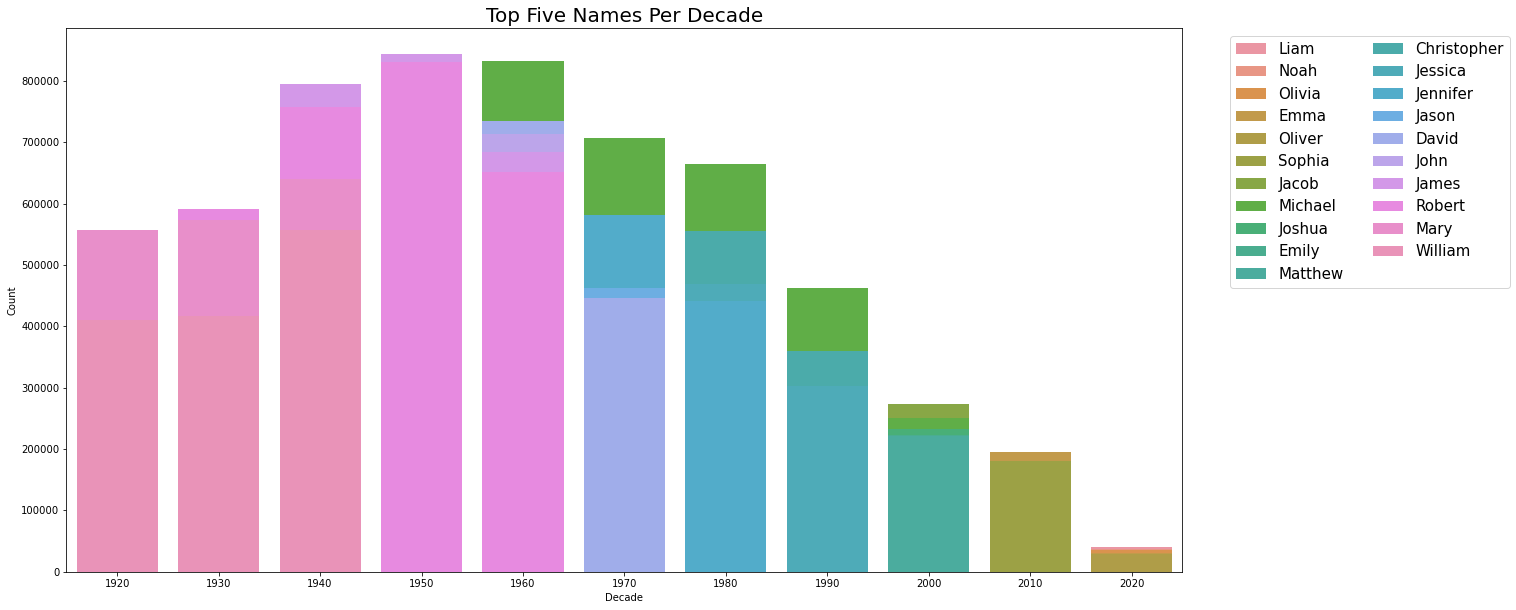

In [4]:
pt.figure(figsize=(20,10))
ax = sns.barplot(x="Decade", y="Count", hue='Name', data=top_five_names_perdecade, dodge=False)
ax.legend(loc='upper right',ncol=2,bbox_to_anchor=(1.3,1),fontsize=15)
ax.set_title('Top Five Names Per Decade', fontsize=20);
ax.set_palette=('rainbow')

There are many things of note in this readout. From the 1920's to the 1960's, the names James, Robert, Mary and William are extremely popular always occupying the list of top 5 names. In the 80's this changed. Jessica, Michael, Christopher were popular up to the 2000's and then in 2010, this changed again Olivia, Emma, Oliver and Liam becoming very popular names. 

There is also a notable reduction in the variety of number of people who have the top five names between the 1960's and the 2000's - looking like there is a wider variety of names in the 21st century than there was in the 20th century. We will analyse this later. 

<span style="color: blue;">

## Distribution of female names in the 1980's
</span>

Now let's look at female names from the 1980's. Again using the names_perdecade dataset, two queries will create the necessary information as one query is based on quantitative values and the other is is based on qualitative values (you cannot combine both within the same query). We'll first get the value of the skewness for the dataset and then use the seaborn histogram plot for this query.

In [5]:
female_names_1980=names_perdecade.query(f'Decade == {decades[4,]}' and 'Count >= 100000')
female_names_1980=female_names_1980.query('Gender == "F"')
                                        # make new dataset of female names with count over 100,000 from 1980's
female_names_1980.kurtosis() # get the value of the Skewness

Decade   -0.826335
Count     5.368687
dtype: float64

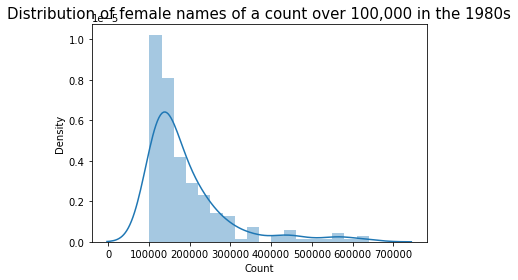

In [6]:
ax=sns.distplot(female_names_1980.Count);
ax.set_title('Distribution of female names of a count over 100,000 in the 1980s', fontsize=15);

As can be observed in the graph, the distribution has a strong positive skew with a value of 5.36, indicating and strong trend towards a small number of names. As can be observed in the bar chart above, the names Jessica and Jennifer occupy a substantial portion of the number of people in the top five count.
<br>
<br>

<span style="color: blue;">
    
## The Decade with the most names
</span>

Let's look at which decade had the most names. We'll begin with a query that sum's the count per decade independent of gender. Again, I'll use the names_perdecade query and use the value_counts parameter to get a count of decades in descending order. To get the result, we can use the .head() command with a parameter of 1 to get the top result.

In [7]:
decade_with_most_names=names_perdecade.value_counts('Decade', ascending=False)
decade_with_most_names.head(1)

Decade
2000    60382
dtype: int64

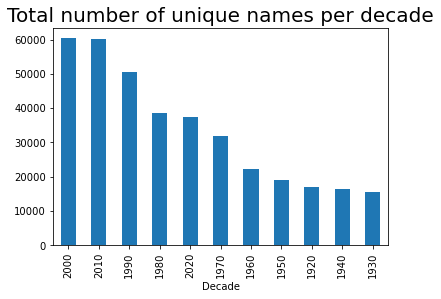

In [8]:
ax=decade_with_most_names.plot(x='Decade',y='Count',kind='bar');
ax.set_title('Total number of unique names per decade', fontsize=20);

The decade with the most unique names was the 2000's with a count of 60382. As was suggested earlier, there is a much wider variety of names given to children born in the 21st century as there was in the 20th century.
<br>
<br>

<span style="color: blue;">
    
## The Average Number of Names per Decade
</span>

The final piece of information to get from our dataset is the average number of names per decade. Again, using the names_perdecade dataset, we can get the mean value of the variable Count, grouped by each decade. We can plot this using a pandas bar plot.

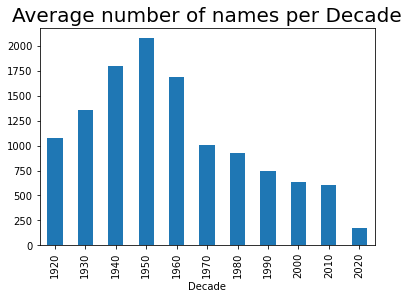

In [9]:
avg_name_perdecade = names_perdecade.groupby('Decade')['Count'].mean()
ax=avg_name_perdecade.plot(x='Decade',y='Count',kind='bar');
ax.set_title('Average number of names per Decade', fontsize=20);

This is an interesting graph in that how it compares with the unique names per decade graph. The decades 2010's and 2020's have the lowest number of average names, but the highest unique names. Alternatively, the 1940's and 50's show the highest averages but the lowest unique names.